In [6]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pylab as plt
from matplotlib import cm
from numpy import sin, cos, tan, exp, pi, e

# Defining the variables and equations of motion

In [8]:
X_LABEL = "theta"
Y_LABEL = "omega"

def DXDT(x, y):
    return(y)
    
def DYDT(x, y):
    return(-sin(x))

# Rendering the phase portrait

In [16]:
# Setting plotting defaults 
X_MIN = -4
X_MAX = 4
Y_MIN = -4
Y_MAX = 4

RES = 0.5
Q_SCALE = 2.0

In [30]:
# Finding critical points

from scipy.optimize import fsolve
from itertools import product

## Needed for critical point solver, DO NOT CHANGE
def DDT(arg):
    x, y = arg
    return(DXDT(x, y), DYDT(x, y))

#
epsilon = 0.01
res_c = 0.1

x = np.arange(X_MIN, X_MAX, res_c)
y = np.arange(Y_MIN, Y_MAX, res_c)
X, Y = np.meshgrid(x, y)

cp_x = []
cp_y = []
for x_0, y_0 in product(x, y):
    x_c, y_c =  fsolve(DDT, (x_0, y_0))
    if len(cp_x) == 0:
        cp_x.append(x_c)
        cp_y.append(y_c)
    else:
        d = np.sqrt((np.array(cp_x) - x_c)**2 + (np.array(cp_x) - y_c)**2)
        if (d > epsilon).all():
            cp_x.append(x_c)
            cp_y.append(y_c)

print("Critical points found at:")            
print([i for i in zip(cp_x,cp_y)])

19888505e-26), (3.141592653589793, -1.1325456129225197e-26), (3.141592653589793, -1.3187307203141226e-32), (3.141592653589793, -6.068690744386999e-26), (3.141592653589793, -4.24861528489339e-26), (3.141592653589793, -1.3893694685458847e-25), (3.141592653589793, -1.3584296166240067e-25), (3.141592653589793, 2.199164891840904e-45), (3.141592653589793, 1.3584780244518617e-25), (3.141592653589793, 1.3893958566750177e-25), (3.141592653589793, 4.2485283387860505e-26), (3.141592653589793, 6.068748773258077e-26), (3.141592653589793, 1.335065498006843e-32), (3.141592653589793, 1.1325345797513508e-26), (3.141592653589793, 2.2796301480324164e-26), (3.141592653589793, 1.2382506649117614e-26), (3.141592653589793, 1.7895099535541946e-27), (3.141592653589793, 2.333766416533434e-33), (3.141592653589793, 1.101143192169749e-26), (3.141592653589793, 1.807810698856836e-27), (3.141592653589793, 1.2312290225527403e-27), (3.141592653589793, 3.426919215096848e-27), (3.141592653589793, 7.414553103404579e-34), 

In [31]:
# Creating the Grid for plotting
x = np.arange(X_MIN, X_MAX, RES)
y = np.arange(Y_MIN, Y_MAX, RES)
X, Y = np.meshgrid(x, y)

# Caculating the change vectors
dxdt = Q_SCALE*DXDT(X, Y)
dydt = Q_SCALE*DYDT(X, Y)

(-4, 4)

/Users/badr/anaconda/envs/Python3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


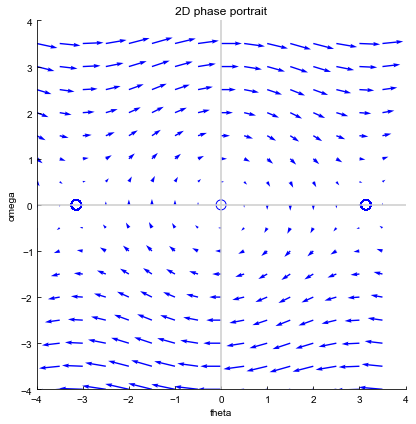

In [33]:
# Plotting the phase diagram

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,aspect='equal')

ax.axhline(0, color='.8')
ax.axvline(0, color='.8')
ax.scatter(cp_x, cp_y, s=100, color='blue', marker='o', facecolor='none')
ax.quiver(x, y, dxdt, dydt, color='blue')
ax.set_xlim([X_MIN, X_MAX])

ax.set_title("2D phase portrait")
ax.set_xlabel(X_LABEL)
ax.set_ylabel(Y_LABEL)
ax.set_ylim([Y_MIN, Y_MAX])

# Approximating dynamics near the critical points

In [20]:
def linearize(x, y, dx_func, dy_func, D=0.000001):
    L = np.array(
        [[(dx_func(x+D,y) - dx_func(x-D,y)) / (2*D), (dx_func(x,y+D) - dx_func(x,y-D)) / (2*D)], 
        [(dy_func(x+D,y) - dy_func(x-D,y)) / (2*D), (dy_func(x,y+D) - dy_func(x,y-D)) / (2*D)]]
    )
    return(L)

def prettyprint_eig(M):
    vals, mat = eig(M)
    for i in range(len(vals)):
        if np.imag(vals[i]) == 0.0:
            vals = np.array(vals, dtype='float')
        print(f"\tEigenvalue {i+1} is {vals[i]:.3}, with vector ({mat[0,i]:.3}, {mat[1,i]:.3})")

In [21]:
Ls = []
for i, (x, y) in enumerate(zip(cp_x, cp_y)):
    L = linearize(x, y, DXDT, DYDT)
    Ls.append(L)
    print(f" At critical point #{i}, ({x}, {y}), the functions are approximated by \n {L}\n")
    

92653589793, -2.8164829952022623e-33), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point #4106, (3.141592653589793, 3.339672020866246e-33), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point #4107, (3.141592653589793, 4.9630142909884706e-34), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point #4108, (3.141592653589793, 1.2436523870882752e-42), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point #4109, (3.141592653589793, -7.043047871348662e-34), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point #4110, (3.141592653589793, -6.808131202808582e-33), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point #4111, (3.141592653589793, 8.290153338023043e-33), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point #4112, (3.141592653589793, 1.2676464957710315e-33), the functions are approximated by 
 [[0. 1.]
 [1. 0.]]

 At critical point

In [22]:
for i, (L, x, y) in enumerate(zip(Ls, cp_x, cp_y)):
    print(f"At critical point #{i}, ({x}, {y}),")
    prettyprint_eig(Ls[i])
    print("")

.707, 0.707)

At critical point #4146, (3.141592653589793, 7.947196160852841e-31),
	Eigenvalue 1 is 1.0, with vector (0.707, 0.707)
	Eigenvalue 2 is -1.0, with vector (-0.707, 0.707)

At critical point #4147, (3.141592653589793, -2.3721983813153317e-30),
	Eigenvalue 1 is 1.0, with vector (0.707, 0.707)
	Eigenvalue 2 is -1.0, with vector (-0.707, 0.707)

At critical point #4148, (3.141592653589793, -3.800321435248904e-40),
	Eigenvalue 1 is 1.0, with vector (0.707, 0.707)
	Eigenvalue 2 is -1.0, with vector (-0.707, 0.707)

At critical point #4149, (3.141592653589793, 4.150524321256255e-31),
	Eigenvalue 1 is 1.0, with vector (0.707, 0.707)
	Eigenvalue 2 is -1.0, with vector (-0.707, 0.707)

At critical point #4150, (3.141592653589793, 1.5292063373971458e-30),
	Eigenvalue 1 is 1.0, with vector (0.707, 0.707)
	Eigenvalue 2 is -1.0, with vector (-0.707, 0.707)

At critical point #4151, (3.141592653589793, -7.460575824047458e-31),
	Eigenvalue 1 is 1.0, with vector (0.707, 0.707)
	Eigenvalue 2

# Simulating solutions to the system 

In [23]:
X_0 = 4 # starting x
Y_0 = 1 # starting y
T_f = 10 # final time

DT = 0.1

## Euler's method

In [24]:
def Euler_next(x, y, dxdt, dydt, dt=DT):
    x_next = x + dxdt(x,y)*dt
    y_next = y + dydt(x,y)*dt
    return(x_next, y_next)

def simulate(x_0, y_0, t_f, simulation_function, dt=DT):
    X_solution = [x_0]
    Y_solution = [y_0]
    T = np.arange(dt, t_f, dt)
    for t in T[1:]:
        x_previous, y_previous = X_solution[-1], Y_solution[-1]
        x_next, y_next = simulation_function(x_previous, y_previous, DXDT, DYDT, dt=dt)
        X_solution.append(x_next)
        Y_solution.append(y_next)
    return (T, X_solution, Y_solution)

def simulate_collection(X_0s, Y_0s, t_f, simulation_function, dt=DT):
    X = []
    Y = []
    for X_0, Y_0 in zip(X_0s, Y_0s):
        T, X_sol, Y_sol = simulate(X_0, Y_0, t_f, simulation_function, dt=DT)
        X.append(X_sol)
        Y.append(Y_sol)
    return T, X, Y

### Simulating Euler's method

In [25]:
T, X_euler, Y_euler = simulate(X_0, Y_0, T_f, Euler_next)

In [26]:
X_euler[:10]

[4,
 4.1,
 4.207568024953079,
 4.3233188210168025,
 4.44782222791545,
 4.581578256560125,
 4.724986344023258,
 4.878308996190142,
 5.0416308548996644,
 5.2148153818407925]

In [27]:
Y_euler[:10]

[1,
 1.0756802495307929,
 1.1575079606372338,
 1.2450340689864698,
 1.3375602864467486,
 1.4340808746313394,
 1.5332265216688323,
 1.6332185870952316,
 1.7318452694112827,
 1.8264740431024835]

### Graphing the simulation

In [28]:
def plot_solution(T, X_solutions, Y_solutions, colors=['.k']):
    fig, (ax, ax_x, ax_y) = plt.subplots(figsize=(12,4), ncols=3)

    # Creating the Grid for plotting
    x = np.arange(X_MIN, X_MAX, RES)
    y = np.arange(Y_MIN, Y_MAX, RES)
    X, Y = np.meshgrid(x, y)

    # Caculating the change vectors
    dxdt = Q_SCALE*DXDT(X, Y)
    dydt = Q_SCALE*DYDT(X, Y)
    
    ax.set_aspect('equal')
    ax.axhline(0, color='.8')
    ax.axvline(0, color='.8')
    ax.scatter(cp_x, cp_y, s=100, color='blue', marker='o', facecolor='none')
    ax.quiver(x, y, dxdt, dydt, color='blue')

    ax.set_title("2D phase portrait")
    ax.set_xlabel(X_LABEL)
    ax.set_ylabel(Y_LABEL)
    ax.set_xlim([X_MIN, X_MAX])
    ax.set_ylim([Y_MIN, Y_MAX])
    
    assert len(X_solutions) == len(Y_solutions)
    if len(colors) != len(X_solutions):
        colors = len(X_solutions) * colors
    for X_solution, Y_solution, color in zip(X_solutions, Y_solutions, colors):
        ax.plot(X_solution, Y_solution, color=color)
        ax.scatter(X_solution[0], Y_solution[0], color=color, zorder=10, s=10.0)

        ax_x.set_title("{0} vs. time".format(X_LABEL))
        ax_x.plot(T, X_solution, color=color)
        ax_x.axhline(0, color='.8', zorder=-1)
        ax_x.scatter(T[0], X_solution[0], color=color, zorder=10, s=10.0)
        ax_x.set_ylabel(X_LABEL)
        ax_x.set_xlabel("Time")
        ax_x.set_ylim([X_MIN, X_MAX])

        ax_y.set_title("{0} vs. time".format(Y_LABEL))
        ax_y.plot(T, Y_solution, color=color)
        ax_y.axhline(0, color='.8', zorder=-1)
        ax_y.scatter(T[0], Y_solution[0], color=color, zorder=10, s=10.0)
        ax_y.set_ylabel(Y_LABEL)
        ax_y.set_xlabel("Time")
        ax_y.set_ylim([Y_MIN, Y_MAX])

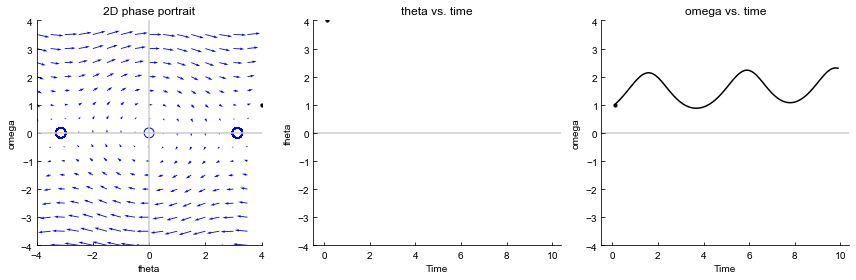

In [29]:
plot_solution(T, [X_euler], [Y_euler], colors=['k'])

## The midpoint method

In [ ]:
X_0 = 0 # starting x
Y_0 = 1 # starting y
T_f = 4*pi # final time

DT = 0.01

In [ ]:
def midpoint_next(x, y, dxdt, dydt, dt=DT):
    x_test = x + dxdt(x,y)*dt
    y_test = y + dydt(x,y)*dt
    
    x_next = x + dxdt((x + x_test)/2., (y + y_test)/2)*dt
    y_next = y + dydt((x + x_test)/2., (y + y_test)/2)*dt
    
    return(x_next, y_next)

### Simulating 

In [ ]:
T, X_euler, Y_euler = simulate(X_0, Y_0, T_f, Euler_next)
T, X_mid, Y_mid = simulate(X_0, Y_0, T_f, midpoint_next)

### Graphing the simulation

In [ ]:
plot_solution(T, [X_mid], [Y_mid], colors=['b'])

## Comparing Midpoint method with Euler method

In [ ]:
plot_solution(T, [X_euler, X_mid], [Y_euler, Y_mid], colors=['k', 'b'])

## Plotting a series of trajectories

In [ ]:
X_MIN = -6
X_MAX = 6
Y_MIN = -6
Y_MAX = 6

X_0s = np.arange(-6, 8, 1)
Y_0s = len(X_0s)*[-1]
T_f = 2

In [ ]:
T, X, Y = simulate_collection(X_0s, Y_0s, T_f, midpoint_next)
colors = [cm.cool(i / float(len(X))) for i in range(len(X))]
plot_solution(T, X, Y, colors=colors)